# **Question 1** - Pseudo-Hamiltonian for the Simple Harmonic Oscillator

The Leapfrog method is:

$$v_{n+1/2} = v_n + a_n \frac{\Delta t}{2} = v_n - x_n \frac{\Delta t}{2}$$
$$x_{n+1/2} = x_n + v_{n + 1/2} \Delta t$$
$$v_{n+1} = v_{n + 1/2} + a_{n + 1} \frac{\Delta t}{2} = v_{n + 1/2} - x_{n + 1} \frac{\Delta t}{2}$$

which can be written in Matrix form as:
$$
\begin{pmatrix}
x_{n+1}\\
v_{n+1}
\end{pmatrix} =
\begin{pmatrix}
1 & 0\\
-\frac{h}{2} & 1
\end{pmatrix}
\begin{pmatrix}
1 & h\\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
-\frac{h}{2} & 1
\end{pmatrix}
\begin{pmatrix}
x_{n}\\
v_{n}
\end{pmatrix}
$$

The Pseudo-Hamiltonian for this system is $$\tilde{H}(h) = \frac{1}{2}x^2 + \frac{1}{2}v^2\frac{1}{1 - h^2/4}$$.

## **a)** Conservation of the Pseudo-Hamiltonian

Use the Jacobian for the leapfrog method to show that the pseudo-Hamiltonian is conserved when using the leapfrog method.

For simplicity, the mass, spring constant, and oscillator frequencies are set to 1 here.

In [12]:
import sympy.matrices as sm
import sympy as sp
from sympy import pprint

def LeapfrogJacobian(dt):
    lf1 = sm.Matrix([[1, 0], [-dt/2, 1]])
    lf2 = sm.Matrix([[1, dt], [0, 1]])
    Jlf = lf1*lf2*lf1
    return Jlf

# Define the symbols
x, v = sp.symbols('x v')
h = sp.symbols('h')

# Define the Pseudo-Hamiltonian for the harmonic oscillator
H = x**2 / 2 + 0.5 * v**2 * (1 / (1-h**2/4))

# Leapfrog method
v_half = v - 0.5 * h * sp.diff(H, x)
x_new = x + h * v_half
v_new = v_half - 0.5 * h * sp.diff(H, x).subs({x: x_new})

# Calculate the Jacobian matrices for the leapfrog steps
jacobian_step1 = sp.Matrix([[sp.diff(v_half, v), sp.diff(v_half, x)],
                            [sp.diff(x_new, v), sp.diff(x_new, x)]])
jacobian_step2 = sp.Matrix([[sp.diff(v_new, v), sp.diff(v_new, x)],
                            [sp.diff(x_new, v), sp.diff(x_new, x)]])

# Multiply the Jacobian matrices
combined_jacobian = jacobian_step2 * jacobian_step1
is_symplectic = combined_jacobian.det().simplify() == 1

# Print the results
pprint(sp.simplify(LeapfrogJacobian(h)))
print("Determinant of the Jacobian:", combined_jacobian.det().simplify())
print("Combined Jacobian is symplectic:", is_symplectic)


⎡     2        ⎤
⎢    h         ⎥
⎢1 - ──    h   ⎥
⎢    2         ⎥
⎢              ⎥
⎢ 3           2⎥
⎢h           h ⎥
⎢── - h  1 - ──⎥
⎣4           2 ⎦
Determinant of the Jacobian: 1.00000000000000
Combined Jacobian is symplectic: True


Mathematically, a method is symplectic if the Jacobian matrix of the discrete map has a determinant equal to 1, indicating that the method preserves the phase space volume. This ensures that trajectories in the phase space do not cross, stretch, or fold under the numerical integration, conserving the qualitative behavior of the system. The symplectic property of a numerical method is related to the preservation of the symplectic structure of Hamiltonian dynamics.

Therefore, since the determinant of the Jacobian is equal to 1, the Leapfrog method is symplectic and, therefore, the Pseudo-Hamiltonian must be conserved.

## **b)** Implemenation of the Leapfrog method

Implement the leapfrog method for the simple harmonic oscillator numerically, and verify that they indeed do conserve $\tilde{H}$.

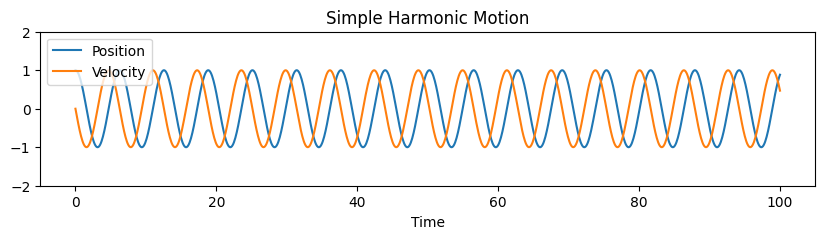

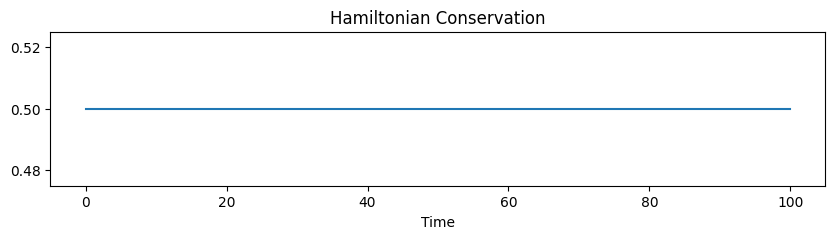

Maximum deviation from initial Hamiltonian: 1.9984014443252818e-15


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def Leapfrog(x, v, h, steps):
    # Setting mass and oscillation frequency as 1
    positions = np.array([x])
    velocities = np.array([v])

    for _ in range(steps):
        v -= 0.5 * h * x   # v half step
        x += h * v    # x step
        v -= 0.5 * h * x # v full step
        
        positions = np.append(positions, x)
        velocities = np.append(velocities, v)

    return positions, velocities

def PseudoHamil(x, v, h):
    H = (x**2 / 2) + ((0.5 * v**2) / (1-(h**2)/4))
    return H

# Initial conditions
x_initial = 1.0
v_initial = 0.0
dt = 0.1
num_steps = 1000

# Perform leapfrog integration
positions, velocities = Leapfrog(x_initial, v_initial, dt, num_steps)

# Calculate Hamiltonian at each step
hamiltonians = [PseudoHamil(x, v, dt) for x, v in zip(positions, velocities)]

# Plot the SHO Motion
time = np.arange(0, dt*num_steps + dt, dt)
plt.figure(1, figsize=(10, 2))
plt.plot(time, positions, label='Position')
plt.plot(time, velocities, label='Velocity')
plt.title("Simple Harmonic Motion")
plt.xlabel('Time')
plt.ylim(-2, 2)
plt.legend()

# Plot the Hamiltonian Conservation
plt.figure(2, figsize=(10, 2))
plt.plot(time, hamiltonians)
plt.title("Hamiltonian Conservation")
plt.xlabel('Time')
plt.ylim(0.475, 0.525)
plt.show()

# Find maxiumum deviation from initial Hamiltonian
max_deviation = max(hamiltonians) - min(hamiltonians)
print("Maximum deviation from initial Hamiltonian:", max_deviation)

Since the Pseudo-Hamiltonian remains constant at 0.5 throughout the course of the simple harmonic motion, with the maximum deviation approaching roundoff error, this verifies that it is conserved.

## **c)** Scaling of Energy Error

Use the code from part b to calculate the scaling of the energy error with the number of steps per oscillation cycle for integrations of:
1. A whole oscillation
2. Half an oscillation

Discuss whether the scalings you find agree with the analytic results for the leapfrog method, given that the analytic results for the energy error is known to be:
$$ Error = E_{n+1} - E_n $$
where
$$ E_n  = \frac{x^2 + v^2}{2}$$
$$ E_{n+1} = \frac{h^6x^2}{16} - \frac{h^5vx}{4} + \frac{h^4v^2}{4} - \frac{h^4x^2}{4} + \frac{hv^3x^2}{2} + v^2 + x $$

Therefore,
$$ Error = (\frac{h^6x^2}{16} - \frac{h^5vx}{4} + \frac{h^4v^2}{4} - \frac{h^4x^2}{4} + \frac{hv^3x^2}{2} + v^2 + x) - (\frac{x^2 + v^2}{2})$$

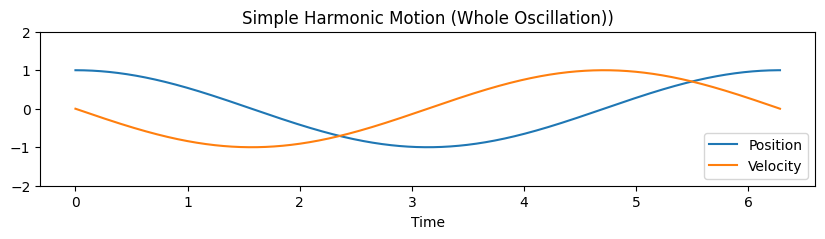

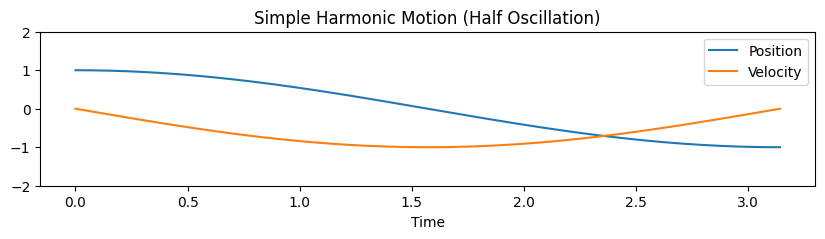

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def Leapfrog_C(x, v, steps, whole = True, plot_m = True, plot_e = False):
    # Setting mass and oscillation frequency as 1 (so ignore them)
    
    positions = np.array([x])
    velocities = np.array([v])
    
    if whole:
        # 1 Whole Oscillation
        h = 2 * np.pi / steps
        e_i = PseudoHamil(x, v, h) # Initial Energy

        for _ in range(steps):
            v -= 0.5 * h * x   # v half step
            x += h * v    # x step
            v -= 0.5 * h * x # v full step

            positions = np.append(positions, x)
            velocities = np.append(velocities, v)

        if plot_m:
            # Plot the SHO Motion
            time = np.arange(0, h*num_steps + h, h)

            plt.figure(figsize=(10, 2))
            plt.plot(time, positions, label='Position')
            plt.plot(time, velocities, label='Velocity')
            plt.title("Simple Harmonic Motion (Whole Oscillation))")
            plt.xlabel('Time')
            plt.ylim(-2, 2)
            plt.legend()
            plt.show()

        if plot_e:
            # Calculate Energy Error
            energy_error = [Energy_Error(e_i, PseudoHamil(x, v, h)) for x, v in zip(positions, velocities)]
        
            # Plot the Energy Error
            plt.figure(figsize=(10, 2))
            plt.plot(time, energy_error)
            plt.title("Total Energy Error")
            plt.xlabel('Time')
            plt.show()

    else:
        # Half an Oscillation
        h = np.pi / steps
        e_i = PseudoHamil(x, v, h) # Initial Energy
        for _ in range(steps):
            v -= 0.5 * h * x   # v half step
            x += h * v    # x step
            v -= 0.5 * h * x # v full step

            positions = np.append(positions, x)
            velocities = np.append(velocities, v)

        if plot_m:
            # Plot the SHO Motion
            time = np.arange(0, h*num_steps + h, h)

            plt.figure(figsize=(10, 2))
            plt.plot(time, positions, label='Position')
            plt.plot(time, velocities, label='Velocity')
            plt.title("Simple Harmonic Motion (Half Oscillation)")
            plt.xlabel('Time')
            plt.ylim(-2, 2)
            plt.legend()

        

        if plot_e:
            # Calculate Energy Error
            energy_error = [Energy_Error(e_i, PseudoHamil(x, v, h)) for x, v in zip(positions, velocities)]

            # Plot the Energy Error
            plt.figure(figsize=(10, 2))
            plt.plot(time, energy_error)
            plt.title("Total Energy Error")
            plt.xlabel('Time')
            plt.show()

    overall_energy_error = Energy_Error(e_i, PseudoHamil(positions[-1], velocities[-1], h))
    return positions, velocities, overall_energy_error

def Energy(x, v):
    # At any given point, the energy is the spring potential + kinetic energy
    E_s = 1 * 0.5 * x**2 # k = 1
    E_k = -1 * 0.5 * v**2 # m = 1
    return E_s + E_k

def PseudoHamil(x, v, h):
    H = (x**2 / 2) + ((0.5 * v**2) / (1-(h**2)/4))
    return H

def Energy_Error(E_i, E_f):
    return abs(E_i - E_f)

# Initial conditions
x_initial = 1.0
v_initial = 0.0
num_steps = 1000

# Perform leapfrog integration
positions, velocities, error = Leapfrog_C(x_initial, v_initial, num_steps)

# Perform leapfrog integration
positions, velocities, error = Leapfrog_C(x_initial, v_initial, num_steps, whole = False)

C:\Users\OEM\AppData\Local\Temp\ipykernel_5088\2646966735.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(min(min(half_error_array), min(whole_error_array)), max(max(half_error_array), max(whole_error_array)))


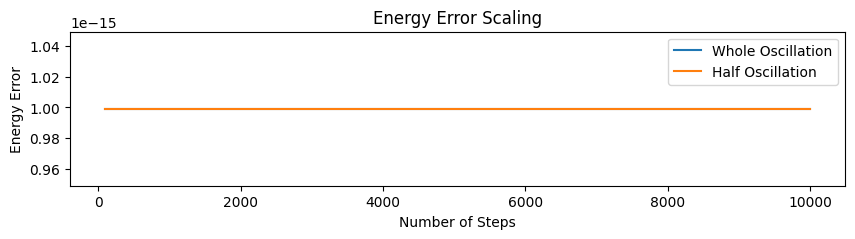

In [109]:
# Perform leapfrog integration and check error with num steps
num_steps = np.linspace(100, 10000, 1000)
whole_error_array = np.array([])
half_error_array = np.array([])

for steps in num_steps:
    steps = int(steps)
    positions, velocities, whole_error = Leapfrog_C(x_initial, v_initial, steps, plot_e = False, plot_m = False)
    whole_error_array = np.append(whole_error_array, error)
    positions, velocities, half_error = Leapfrog_C(x_initial, v_initial, steps, whole = False, plot_e = False, plot_m = False)
    half_error_array = np.append(half_error_array, error)

# Plot the Energy Error
plt.figure(3, figsize=(10, 2))
plt.plot(num_steps, whole_error_array, label = 'Whole Oscillation')
plt.plot(num_steps, half_error_array, label = 'Half Oscillation')
plt.title("Energy Error Scaling")
plt.xlabel('Number of Steps')
plt.ylabel('Energy Error')
plt.legend()
plt.ylim(min(min(half_error_array), min(whole_error_array)), max(max(half_error_array), max(whole_error_array)))
plt.show()

# **Question 2** - Eigenvalue Problem for the wave on a string

## **a)** Difference Equations

Show that the difference equations for a wave on a string can be written in the form
$$ A \cdot f = \omega ^2b\cdot f$$
where $A$ is a tridiagonal matrix, and $b$ is a diagonal matrix.

**Proof:**

Consider the 1D wave equation for a string:
$$\frac{\partial ^2y}{\partial t^2} = v^2\frac{\partial ^2y}{\partial x^2}$$

To discretise this equation, replace the partial derivatives with their respective finite difference approximations. Assuming a uniform grid with points in space and time, we can write the second derivatives using central differences:
$$\frac{\partial ^2y}{\partial t^2} \approx \frac{y(x, t + \Delta t)-2y(x, t) + y(x, t - \Delta t)}{\Delta t^2}$$
$$\frac{\partial ^2y}{\partial t^2} \approx \frac{y(x + \Delta x, t)-2y(x, t) + y(x - \Delta x, t)}{\Delta x^2}$$

Letting $y_i^n$ represent the value of the function at the $i^{th}$ spatial grid point and the $n^{th}$ time, we can replace the second derivatives in the wave equation to get:
$$\frac{\partial ^2y}{\partial t^2} = v^2\frac{\partial ^2y}{\partial x^2}$$
$$\Downarrow$$
$$\frac{y_i^{n+1}-2y_i^{n} + y_i^{n-1}}{\Delta t^2} = v^2\frac{y_{i+1}^n-2y_{i}^n + y_{i-1}^n}{\Delta x^2}$$

Now, we can rearrange terms to solve for $y_i^{n+1}$ in terms of the previous time steps to get:
$$y_i^{n+1} = v^2 \frac{\Delta t^2}{\Delta x^2}(y_{i+1}^n - 2y_{i}^n + y_{i-1}^n) + 2y_i^{n} - y_i^{n-1}$$

In matrix form we can represent the equation as:

$$\begin{bmatrix}
y_1^{n+1} \\
y_2^{n+1} \\
\vdots \\
y_{N-1}^{n+1}
\end{bmatrix}
= A \cdot \begin{bmatrix}
y_1^n \\
y_2^n \\
\vdots \\
y_{N-1}^n
\end{bmatrix}
$$

where N represents the number of spatial grid points and A is the tridiagonal matrix:
$$
\alpha = v^2\frac{\Delta t^2}{\Delta x^2}
$$
$$
A = \begin{bmatrix}
2 - 2\alpha & \alpha & 0 & \cdots & 0 \\
\alpha & 2 - 2\alpha & \alpha & \ddots & \vdots \\
0 & \alpha & 2 - 2\alpha & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \alpha \\
0 & \cdots & 0 & \alpha & 2 - 2\alpha \\
\end{bmatrix}
$$

Similarly, $y_i^{n+1}$ on the left-hand side can be written in terms of the previous time step and the current time step:
$$y_i^{n+1} = \omega ^2y_i^n$$

where $\omega ^2$ is the square of the angular frequency, This can be represented as a diagonal matrix $b$ with $\omega ^2$ along the diagonal entries:
$$
b = \begin{bmatrix}
\omega ^2 & 0 & 0 & \cdots & 0 \\
0 & \omega ^2 & 0 & \ddots & \vdots \\
0 & 0 & \omega ^2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & 0 & \omega ^2 \\
\end{bmatrix}
$$

Therefore, the difference equation for the wave on a string can be represented in the form
$$A \cdot f = \omega ^2b\cdot f$$
where $A$ is a tridiagonal matrix, $b$ is a diagonal matrix, and $f$ is the vector representing the function values at different spatial grid points.


## **b)** Solving for the values

Use *scipy.linalg.eigh* to solve for the eigenvalues and eigenvectors. Plot the first 8 eigenfunctions $f(x)$ and compare the frequencies with our results from the shooting method. Do this for both a constant density string and a string with density $\rho \propto 1 + 10x^2$.

**Shooting Method code is taken from the GitHub solutions for the relevant exercise**

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize
import scipy.special
import time

# First do the constant density string to check with the known frequencies
# and eigenfunctions

def derivs(x, y, omega):
    f, g = y
    dfdx = g
    density = 1
    dgdx = - omega**2 * density * f
    return dfdx, dgdx

def do_integration(omega):
    result = scipy.integrate.solve_ivp(derivs, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
    return result.y[0,-1]

def shoot_const():
    fig = plt.figure(figsize = (6,10))
    plt.title("Shooting Method (Constant Density)")

    # We'll take advantage of the known frequencies for this case to define the search windows
    oms = np.pi * np.array((1,2,3,4,5,6))
    num = len(oms)

    for i, om in enumerate(oms):
        # search within 10% of the analytic frequency
        omega = scipy.optimize.brentq(do_integration, 0.9*om, 1.1*om)
        
        result = scipy.integrate.solve_ivp(derivs, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
        x = result.t
        f = result.y[0]

        # find the number of zero crossings (not including the endpoints)
        n = ((f[1:-1] * f[:-2]) < 0).sum()

        plt.subplot(num,1,1+i)
        plt.plot(x, f)
        plt.plot((0,1),(0,0), 'ko')

    plt.show()

def rho(x):
    rho = 1.0 + 10*x**2
    #rho = np.ones_like(x)
    return rho

def shoot_vary():
    # Now do an x-dependent density

    # Evaluate the displacement at x=1 on a grid of omega
    oms = np.pi * np.linspace(0.1,5,100)
    result = np.array([do_integration(om) for om in oms]) 
    # identify the zero-crossings as initial guesses for mode frequencies
    inds = np.where(np.diff(np.sign(result)))[0]

    plt.clf()
    num = len(inds)
    fig = plt.figure(figsize = (6,14))

    for i, ind in enumerate(inds):
        omega = scipy.optimize.brentq(do_integration, oms[ind], oms[ind+1])

        result = scipy.integrate.solve_ivp(derivs, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
        x = result.t
        f = result.y[0]

        # find the number of zero crossings (not including the endpoints)
        n = ((f[1:-1] * f[:-2]) < 0).sum()

        plt.subplot(num,1,1+i)
        plt.plot(x, f)
        plt.plot((0,1),(0,0), 'ko')

    plt.show()

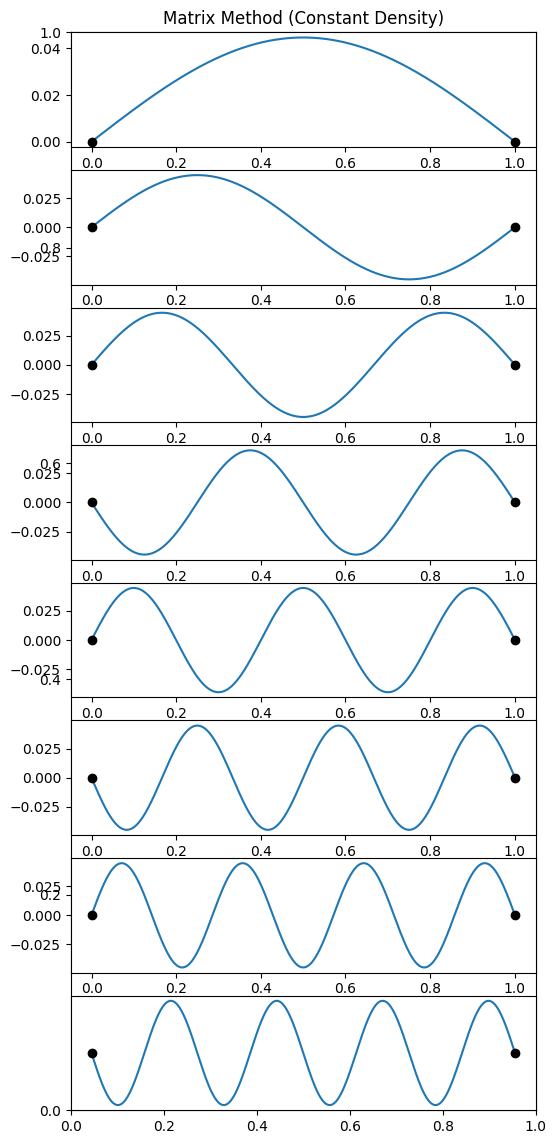

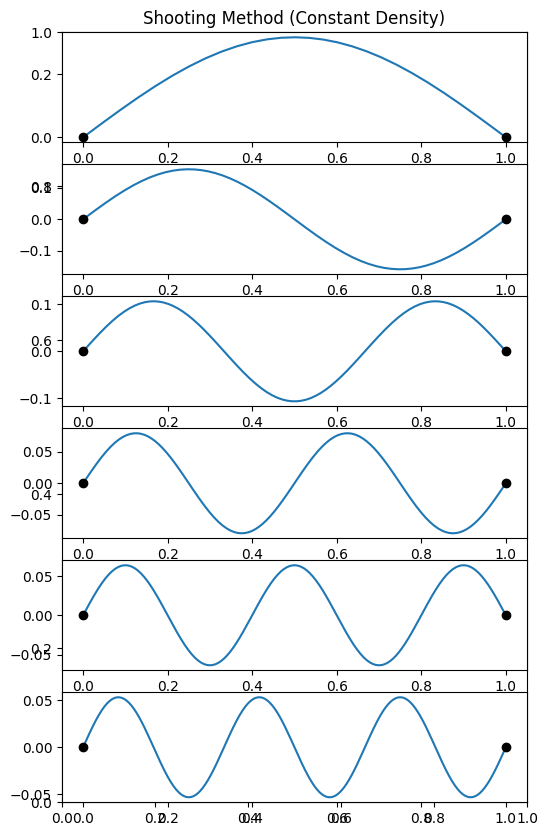

In [107]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

plot_modes = 8

string_length = 1.0
N = 1000 # Number of grid points in spatial domain
dx = string_length / (N-1) # Spatial step size
dt = 0.001 # Time step size
c = 1.0 # Wave speed

alpha = (c**2) * (dt**2) / (dx**2) # Constant in the finite difference scheme

x = np.linspace(0, 1, N)


#####################
# Constant Density
#####################

A_constant_density = np.diag(2*np.ones(N)) - np.diag(alpha*np.ones(N-1), k=1) - np.diag(alpha*np.ones(N-1), k=-1)

eigenvalues_const, eigenvectors_const = eigh(A_constant_density)

### Plot Results ###
fig1 = plt.figure(figsize = (6,14))
plt.title("Matrix Method (Constant Density)")

for i in range(plot_modes):
    plt.subplot(plot_modes, 1, 1+i)
    ax1 = plt.gca()
    plt.plot(x, eigenvectors_const[:, i], label=f"Mode {i+1}")
    plt.plot((0,1),(0,0), 'ko')
    ax_c = plt.gca()

ax_c.xaxis.set_tick_params(labelbottom=False)
ax_c.yaxis.set_tick_params(labelleft=False)
ax_c.set_xticks([])
ax_c.set_yticks([])

ax1.xaxis.set_tick_params(labelbottom=False)
ax1.yaxis.set_tick_params(labelleft=False)
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()

shoot_const()

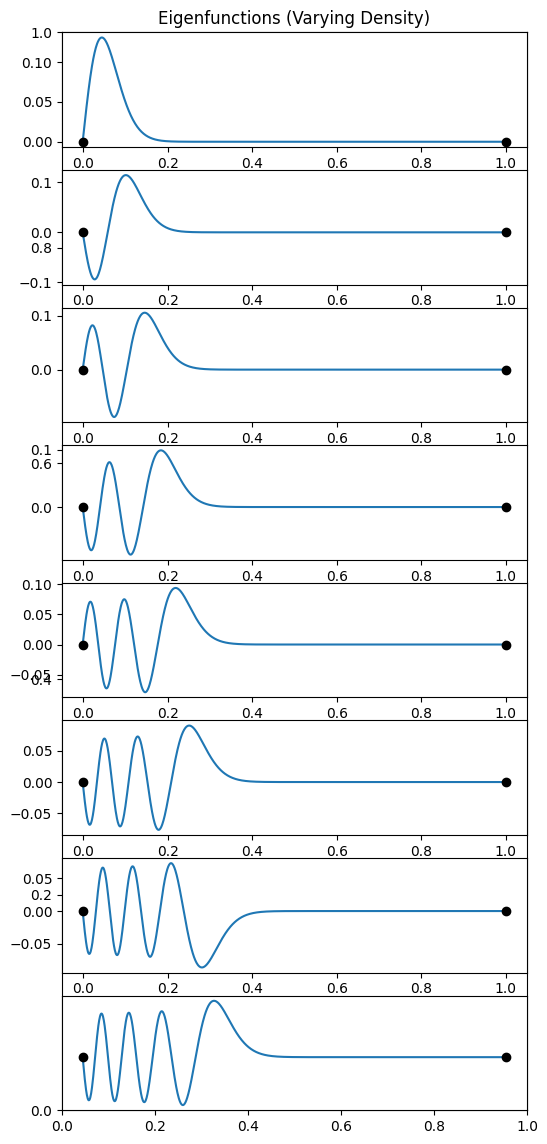

<Figure size 640x480 with 0 Axes>

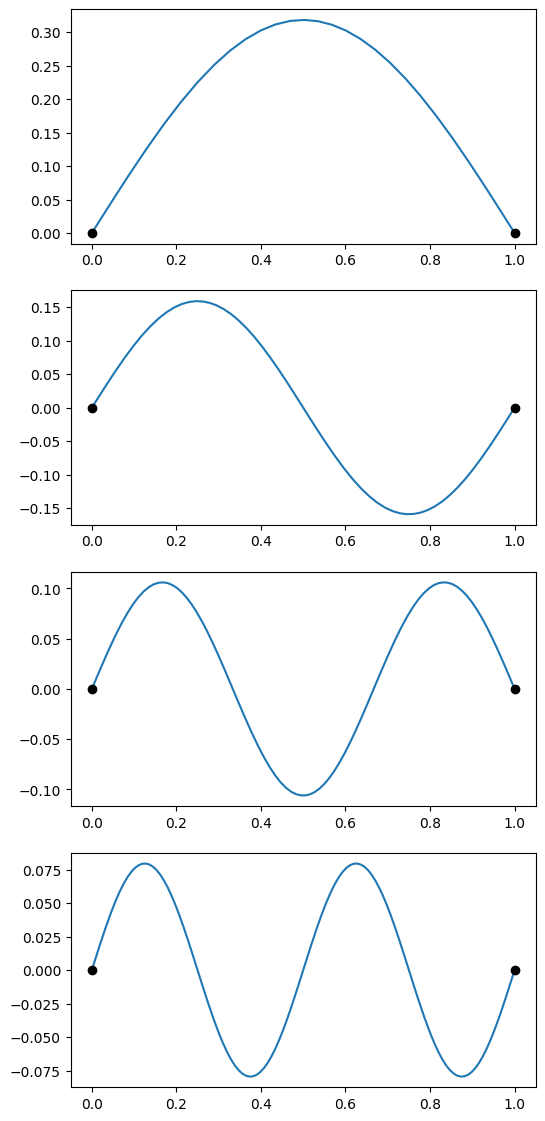

In [108]:
#####################
# Varying Density String
#####################

rho = 1 + 10 * x**2
A_varying_density = np.diag(2*rho) - np.diag(alpha*rho[:-1], k=1) - np.diag(alpha*rho[:-1], k=-1)

eigenvalues_varying, eigenvectors_varying = eigh(A_varying_density)

### Plot Results ###

fig2 = plt.figure(figsize = (6,14))
plt.title('Eigenfunctions (Varying Density)')
for i in range(plot_modes):
    plt.subplot(plot_modes, 1, 1+i)
    ax2 = plt.gca()
    plt.plot(x, eigenvectors_varying[:, i], label=f"Mode {i+1}")
    plt.plot((0,1),(0,0), 'ko')
    ax_v = plt.gca()

ax_v.xaxis.set_tick_params(labelbottom=False)
ax_v.yaxis.set_tick_params(labelleft=False)
ax_v.set_xticks([])
ax_v.set_yticks([])

ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

shoot_vary()